## Dataset Pre-pre Processing

Getting the birds dataset into the right format

In [1]:
import cv2
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

## Verify Cropping with One Image

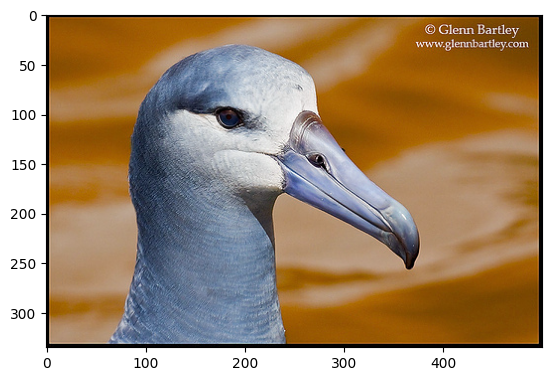

In [2]:
img = cv2.imread("../datasets/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg")

plt.imshow(img)
plt.show()
# cv2.waitKey(0)

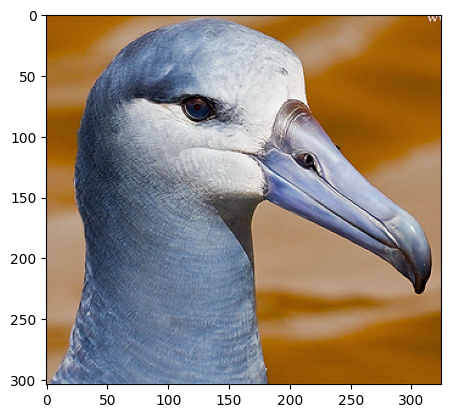

In [3]:
x = 60
y = 27
w = 325
h = 304
crop_img = img[y:y+h, x:x+w]
plt.imshow(crop_img)
plt.show()

## Process the Dataset

In [15]:
ids = pd.read_csv("../datasets/CUB_200_2011/images.txt", sep= " ", header=None)
class_labels = pd.read_csv("../datasets/CUB_200_2011/image_class_labels.txt", sep=" ", header = None)

ids.columns = ["id", "class"]
class_labels.columns =["id", "class_num"]
class_labels["class_num"] = class_labels["class_num"] - 1 # Fix the indexing

bounds = pd.read_csv("../datasets/CUB_200_2011/bounding_boxes.txt", sep=" ", header=None)
bounds.columns = ["id", "x", "y", "w", "h"]

tts = pd.read_csv("../datasets/CUB_200_2011/train_test_split.txt", sep = " ", header = None)
tts.columns = ["id", "is_training"]

df = pd.merge(ids, bounds, on="id", how="left")
df = pd.merge(df, tts, on="id", how="left")
df = pd.merge(df, class_labels, on="id", how="left")

In [18]:
df.head()

,id,class,x,y,w,h,is_training,class_num
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,60.0,27.0,325.0,304.0,0,0
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,139.0,30.0,153.0,264.0,1,0
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,14.0,112.0,388.0,186.0,0,0
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,112.0,90.0,255.0,242.0,1,0
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,70.0,50.0,134.0,303.0,1,0


In [19]:
# Crop and Save Images

for row in df.values:
    iid, cls, x, y, w, h, training, class_num = row
    x, y, w, h = int(x), int(y), int(w), int(h)
    img = cv2.imread("../datasets/CUB_200_2011/images/" + cls)
    cropped_img = img[y:y+h, x:x+w]
    
    
    
    if training:
        path = "../datasets/cub200_cropped/train_cropped/" + str(class_num)
        if not os.path.exists(path):
            os.mkdir(path)
        cv2.imwrite("../datasets/cub200_cropped/train_cropped/" + str(class_num) + "/" +  str(iid) + ".jpg", cropped_img)
    else:
        path = "../datasets/cub200_cropped/test_cropped/" + str(class_num)
        if not os.path.exists(path):
            os.mkdir(path)
        cv2.imwrite("../datasets/cub200_cropped/test_cropped/" + str(class_num) + "/" + str(iid) + ".jpg", cropped_img)

    

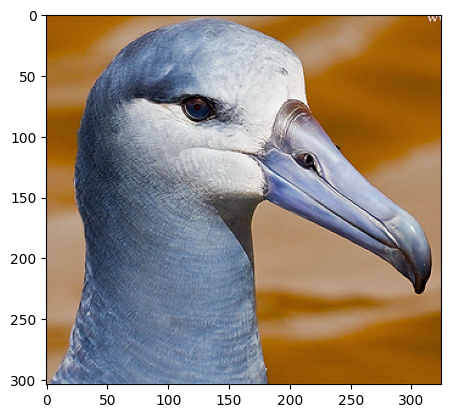

In [48]:
plt.imshow(crop_img)
plt.show()